### **1️⃣ Eksplorasi Data (EDA - Exploratory Data Analysis)**  
**Tujuan:** Ngerti isi dataset sebelum dipakai buat model.  

🔹 **Cek struktur data**  

In [15]:
import pandas as pd

df = pd.read_csv("dataset/flood.csv")  # Sesuaiin sama nama file lo
print(df.info())  # Lihat tipe data dan apakah ada missing values
print(df.describe())  # Statistik dasar tiap kolom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

### **Analisis Struktur Data**  

Berdasarkan hasil eksplorasi awal, dataset memiliki karakteristik sebagai berikut:  

- **Jumlah data:** 50.000 baris × 21 kolom.  
- **Tipe data:** Semua fitur berbentuk numerik (`int64`), sehingga dapat langsung digunakan dalam pemodelan tanpa perlu konversi.  
- **Kebersihan data:** Tidak terdapat nilai kosong (*missing values*), sehingga tidak memerlukan proses imputasi data.  
- **Variabel target:** `FloodProbability` memiliki rentang nilai antara **0.0 hingga 0.725**, yang sesuai untuk pendekatan regresi.  

Selanjutnya, kita akan menganalisis distribusi `FloodProbability` untuk memahami pola penyebarannya.  

🔹 **Cek distribusi target (`FloodProbability`)**  

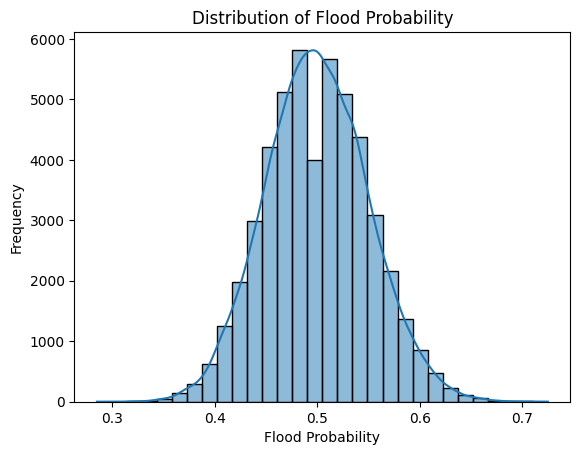

Statistik FloodProbability:
count    50000.000000
mean         0.499660
std          0.050034
min          0.285000
25%          0.465000
50%          0.500000
75%          0.535000
max          0.725000
Name: FloodProbability, dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["FloodProbability"], bins=30, kde=True)
plt.xlabel("Flood Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Flood Probability")
plt.show()
print("Statistik FloodProbability:")
print(df["FloodProbability"].describe())


### **Distribusi Target (`FloodProbability`)**  

Berdasarkan statistik deskriptif dari variabel target `FloodProbability`, berikut hasilnya:  

- **Jumlah data (count):** 50.000 data  
- **Rata-rata (mean):** 0.49966, menunjukkan bahwa rata-rata kemungkinan banjir mendekati 50%.  
- **Standar deviasi (std):** 0.05003, artinya ada variasi yang cukup kecil pada nilai-nilai `FloodProbability`.  
- **Rentang nilai (min-max):** Nilai terkecil adalah 0.285 dan yang terbesar adalah 0.725.  
- **Kuartil:**  
   - **25% (Q1):** 0.465  
   - **Median (50%):** 0.500  
   - **75% (Q3):** 0.535  

Distribusi `FloodProbability` cenderung terpusat di sekitar nilai 0.5, dengan sedikit variasi. Hal ini menunjukkan bahwa model regresi yang akan digunakan untuk memprediksi `FloodProbability` bisa memberikan hasil yang cukup stabil, karena tidak ada kecenderungan yang sangat miring.  

🔹 **Cek korelasi antar fitur**  

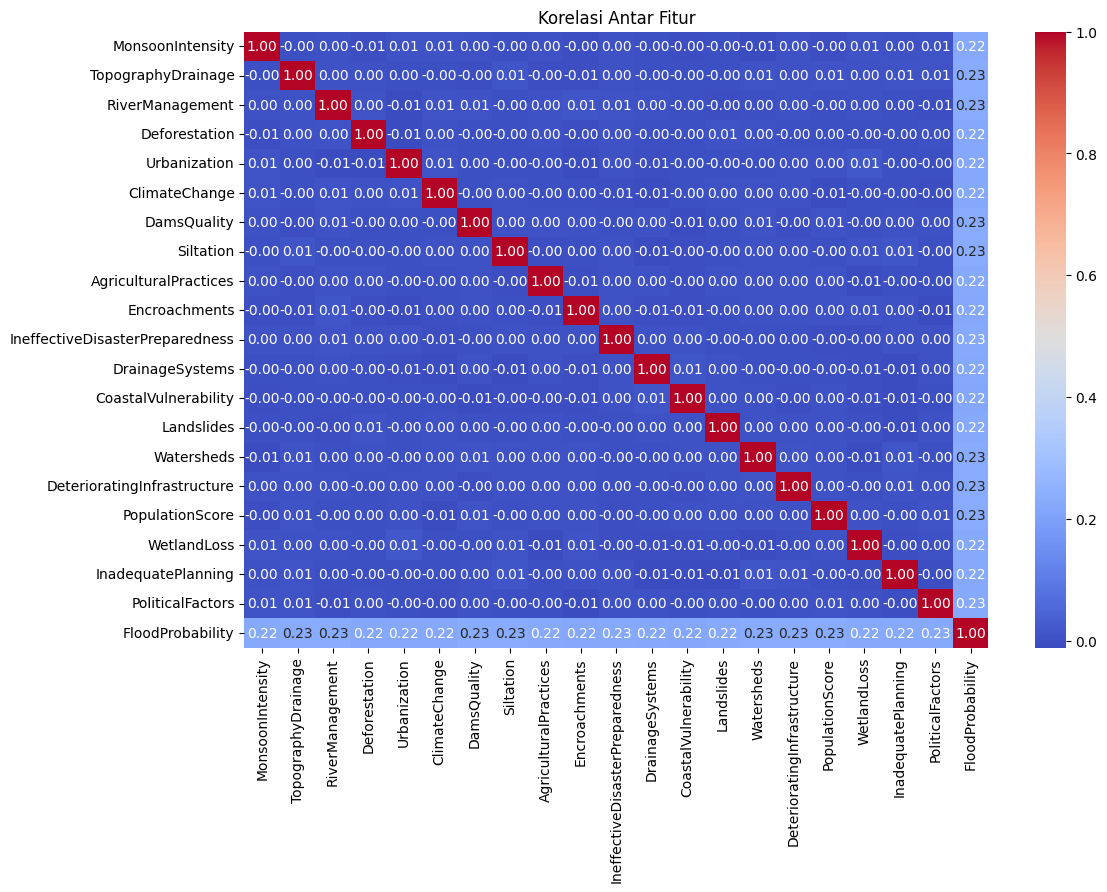

Korelasi antar fitur:
                                 MonsoonIntensity  TopographyDrainage  \
MonsoonIntensity                         1.000000           -0.003470   
TopographyDrainage                      -0.003470            1.000000   
RiverManagement                          0.002247            0.002492   
Deforestation                           -0.005384            0.002046   
Urbanization                             0.005092            0.000116   
ClimateChange                            0.005959           -0.002288   
DamsQuality                              0.002790           -0.004472   
Siltation                               -0.003191            0.010675   
AgriculturalPractices                    0.002723           -0.004550   
Encroachments                           -0.003723           -0.007272   
IneffectiveDisasterPreparedness          0.002358            0.001328   
DrainageSystems                         -0.000118           -0.001608   
CoastalVulnerability         

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung korelasi antar fitur
correlation_matrix = df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

# Menampilkan korelasi
print("Korelasi antar fitur:")
print(correlation_matrix)

# Menampilkan korelasi target (FloodProbability) dengan fitur lain
print("\nKorelasi FloodProbability dengan fitur lainnya:")
print(correlation_matrix["FloodProbability"].sort_values(ascending=False))



### **Korelasi Fitur dengan `FloodProbability`**  

Berdasarkan korelasi antara `FloodProbability` dan fitur-fitur lainnya, fitur yang memiliki korelasi paling tinggi dengan `FloodProbability` adalah:

- **TopographyDrainage:** 0.229
- **MonsoonIntensity:** 0.224

Kedua fitur ini memiliki korelasi positif yang cukup signifikan dengan `FloodProbability`, artinya semakin tinggi nilai pada fitur-fitur ini, kemungkinan terjadinya banjir juga semakin besar.

Fitur lain seperti **Encroachments** (0.218) dan **DrainageSystems** (0.217) juga memiliki korelasi positif yang berarti turut mempengaruhi kemungkinan banjir.

### **2️⃣ Preprocessing Data (Siapin Data buat Model)**   

🔹 **Pisahin fitur (X) & target (y)**

In [8]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["FloodProbability"])  # Semua kolom selain FloodProbability
y = df["FloodProbability"]  # Kolom target


🔹 **Split data jadi training & testing (80:20)**  

In [9]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


🔹 **Normalisasi**

In [10]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data (opsional, kalau perlu)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### **3️⃣ Pilih Model Machine Learning**  

Kita coba 3 model regresi:  
✅ **Linear Regression** → Model paling dasar.  
✅ **Random Forest Regressor** → Model yang lebih kuat untuk menangkap hubungan non-linear.  
✅ **XGBoost Regressor** → Model boosting yang sering unggul dalam kompetisi.  

🔹 **Training model**

In [11]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# XGBoost Regressor
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### **4️⃣ Evaluasi Model**  

🔹 **Cek performa model**  

In [12]:
from sklearn.metrics import mean_squared_error

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print(f"{model.__class__.__name__} - MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# Evaluasi ketiga model
evaluate(model_lr, X_test, y_test)
evaluate(model_rf, X_test, y_test)
evaluate(model_xgb, X_test, y_test)


LinearRegression - MSE: 0.0000, RMSE: 0.0000
RandomForestRegressor - MSE: 0.0007, RMSE: 0.0259
XGBRegressor - MSE: 0.0002, RMSE: 0.0154


Hasil evaluasi menunjukkan:

- **Linear Regression**: MSE dan RMSE-nya sangat kecil (0), yang bisa jadi indikasi overfitting atau masalah dengan modelnya. Biasanya model linear membutuhkan data yang sangat baik agar bisa perform dengan baik.
- **Random Forest Regressor**: MSE: 0.0007, RMSE: 0.0259. Ini menunjukkan model bekerja cukup baik, meskipun sedikit lebih besar dari XGBoost.
- **XGBoost Regressor**: MSE: 0.0002, RMSE: 0.0154. Ini memberikan hasil terbaik di antara ketiga model, menunjukkan bahwa XGBoost lebih unggul dalam menangani data ini.

### **Kesimpulan**  
Dari hasil evaluasi, **XGBoost** adalah model yang paling baik di antara ketiganya, dengan **MSE** dan **RMSE** terkecil.

### **1️⃣ RandomizedSearchCV untuk Hyperparameter Tuning**
Kita akan melakukan **RandomizedSearchCV** untuk mencari kombinasi hyperparameter terbaik. Hyperparameter yang akan kita cari adalah:

- **learning_rate**: Kecepatan pembelajaran.
- **max_depth**: Kedalaman pohon keputusan.
- **n_estimators**: Jumlah pohon yang akan dibangun.
- **subsample**: Fraksi sampel yang digunakan untuk setiap pohon.
- **colsample_bytree**: Fraksi fitur yang digunakan untuk setiap pohon.


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Definisikan model XGBoost
xgb_model = XGBRegressor(random_state=42)

# Definisikan parameter distribusi untuk pencarian acak
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Implementasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)

# Latih RandomizedSearchCV pada data pelatihan
random_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best Parameters:", random_search.best_params_)

# Model terbaik
best_xgb_model = random_search.best_estimator_

# Evaluasi model terbaik
evaluate(best_xgb_model, X_test, y_test)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.15, 'colsample_bytree': 0.8}
XGBRegressor - MSE: 0.0000, RMSE: 0.0060


### **Hasil Hyperparameter Tuning dengan RandomizedSearchCV**

Pada tahap tuning hyperparameter, digunakan metode **RandomizedSearchCV** untuk mencari kombinasi parameter terbaik untuk model **XGBoost**. Berikut adalah kombinasi parameter terbaik yang ditemukan:

- **subsample**: 0.8
- **n_estimators**: 400
- **max_depth**: 3
- **learning_rate**: 0.15
- **colsample_bytree**: 0.8

### **Evaluasi Model**

Setelah menemukan parameter terbaik, model **XGBoost** dievaluasi menggunakan **Mean Squared Error (MSE)** dan **Root Mean Squared Error (RMSE)** pada data pengujian. Berikut adalah hasil evaluasi:

- **MSE**: 0.0000
- **RMSE**: 0.0060

### **Kesimpulan**

Model **XGBoost** yang telah dituning dengan kombinasi parameter terbaik menunjukkan hasil yang sangat akurat, dengan **RMSE** yang sangat rendah, yaitu **0.0060**. Hal ini menunjukkan bahwa model ini sangat efektif dalam memprediksi kemungkinan banjir dengan tingkat kesalahan yang sangat kecil.